# Ejercicio filas de espera Carrefour
---
- Autor: **[Rodrigo Maranzana](https://www.linkedin.com/in/rodrigo-maranzana/)**
- Año: **2020**
- Licencia: **[MIT License](https://github.com/harb-OR/casos_practicos/blob/master/LICENSE)**
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Funciones-para-métricas-de-M/M/1-y-M/M/s:" data-toc-modified-id="Funciones-para-métricas-de-M/M/1-y-M/M/s:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Funciones para métricas de M/M/1 y M/M/s:</a></span></li><li><span><a href="#Caso-ejemplo" data-toc-modified-id="Caso-ejemplo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Caso ejemplo</a></span></li></ul></div>

In [2]:
from math import factorial
import matplotlib.pyplot as plt
import pylab as pl

### Funciones para métricas de M/M/1 y M/M/s:

Se escriben las funciones directo de las ecuaciones de Ws, Wq, Ls y Lq.

In [3]:
# Funciones para filas M/M/1:
## Cantidad media de personas en la fila:
def calcular_lq_mm1(lambd, mu):
    return (lambd**2) / (mu * (mu - lambd))

## Tiempo medio de espera en la fila:
def calcular_wq_mm1(lambd, mu):
    return lambd / (mu*(mu - lambd))

In [4]:
# Funciones para filas M/M/s:
## p0:
def calcular_p0_mms(lambd, mu, s):
    rho = lambd / (s*mu)
    
    a = (rho**s) / factorial(s)
    b = (s*mu) / (s*mu - lambd)
    c = sum([(rho ** i) / factorial(i) for i in range(0, s)])
    
    return 1 / (a * b + c)

## Cantidad media de personas en la fila:
def calcular_lq_mms(lambd, mu, s, p0):
    rho = lambd / (s*mu)
    
    return ((rho**s) * lambd * mu * p0) / (factorial(s-1) * ((s*mu - lambd)**2))

## Tiempo medio de espera en la fila:
def calcular_wq_mms(lq_mms, lambd):
    return lq_mms / lambd

In [5]:
# Funciones comunes a ambos sistemas:
## Cantidad media de personas en el sistema:
def calcular_ls(lq, mu, lambd):
    return lq + (lambd / mu)

## Tiempo medio en el sistema:
def calcular_ws(wq, mu):
    return wq + 1/mu

### Caso ejemplo
Se resuelven las ecuaciones para el siguiente caso:
* 1 persona por minuto llega a cada caja.
* El tiempo medio de servicio es de 45 segundos.
* Existen 2 servidores

In [6]:
lambd = 7
mu = 10
s = 1

if lambd > mu:
    raise Exception('No se cumple el régimen permanente')

if lambd > s*mu:
    raise Exception('No se cumple el régimen permanente')
    
lq_mm1 = calcular_lq_mm1(lambd, mu)
wq_mm1 = calcular_wq_mm1(lambd, mu)

resultados_mm1 = {'config': 'M/M/1',
                  'lq': lq_mm1*s,
                  'wq': wq_mm1,
                  'ls': calcular_ls(lq_mm1, mu, lambd)*s,
                  'ws': calcular_ws(wq_mm1, mu)}

p0_mms = calcular_p0_mms(s*lambd, mu, s)
lq_mms = calcular_lq_mms(s*lambd, mu, s, p0_mms)
wq_mms = calcular_wq_mms(lq_mms, s*lambd)

resultados_mms = {'config': 'M/M/%s' % s,
                  'lq': lq_mms, 
                  'wq': wq_mms,
                  'ls': calcular_ls(lq_mms, mu, s*lambd),
                  'ws': calcular_ws(wq_mms, mu)}

for config_i in (resultados_mm1, resultados_mms):
    print('Resultados para configuración %s: \n' % config_i['config'],
          'Tiempo medio en fila: %0.2f \n' % config_i['wq'],
          'Tiempo medio en sistema: %0.2f \n' % config_i['ws'],
          'Largo medio de la fila: %0.2f \n' % config_i['lq'], 
          'Cantidad media de personas en sistema: %0.2f \n' % config_i['ls'])

Resultados para configuración M/M/1: 
 Tiempo medio en fila: 0.23 
 Tiempo medio en sistema: 0.33 
 Largo medio de la fila: 1.63 
 Cantidad media de personas en sistema: 2.33 

Resultados para configuración M/M/1: 
 Tiempo medio en fila: 0.23 
 Tiempo medio en sistema: 0.33 
 Largo medio de la fila: 1.63 
 Cantidad media de personas en sistema: 2.33 



A continuación variamos el parámetro de llegadas para encontrar el impacto en cada métrica de los dos sistemas de filas. Particularmente queremos ver en para qué lambda es mejor un sistema sobre otro.

In [7]:
s = 2
lambd = 1
T0 = 0.01
Tn = 1/(lambd + 0.1)

step = 0.01
T_range = pl.frange(T0, Tn, step)

lq_mm1 = [0]*len(T_range)
ls_mm1 = [0]*len(T_range)
wq_mm1 = [0]*len(T_range)
ws_mm1 = [0]*len(T_range)

lq_mms = [0]*len(T_range)
ls_mms = [0]*len(T_range)
wq_mms = [0]*len(T_range)
ws_mms = [0]*len(T_range)

for idx, mu_i in enumerate(1/T_range):
    
    # M/M/1
    lq_mm1[idx] = calcular_lq_mm1(lambd, mu_i)
    wq_mm1[idx] = calcular_wq_mm1(lambd, mu_i)
    ls_mm1[idx] = calcular_ls(lq_mm1[idx], mu_i, lambd)*s
    ws_mm1[idx] = calcular_ws(wq_mm1[idx], mu_i)
    
    # M/M/s
    p0_mms = calcular_p0_mms(s*lambd, mu_i, s)
    lq_mms[idx] = calcular_lq_mms(s*lambd, mu_i, s, p0_mms)
    wq_mms[idx] = calcular_wq_mms(lq_mms[idx], s*lambd)
    ls_mms[idx] = calcular_ls(lq_mms[idx], mu_i, s*lambd)
    ws_mms[idx] = calcular_ws(wq_mms[idx], mu_i) 

Ploteamos los resultados

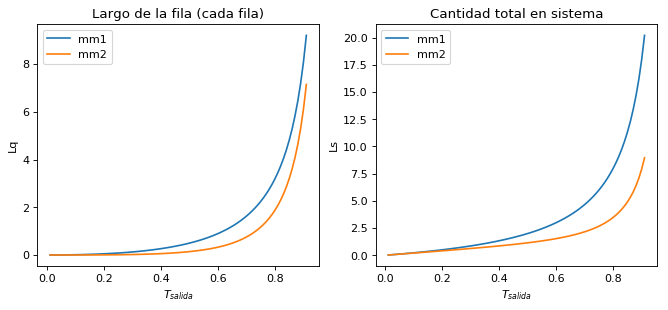

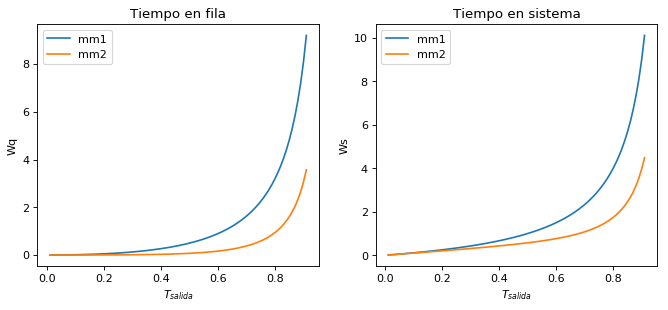

In [8]:
# Plot results:

plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(T_range, lq_mm1)
plt.plot(T_range, lq_mms)
plt.legend(['mm1', 'mm2'])
plt.title('Largo de la fila (cada fila)')
plt.xlabel('$T_{salida}$')
plt.ylabel('Lq')

plt.subplot(122)
plt.plot(T_range, ls_mm1)
plt.plot(T_range, ls_mms)
plt.legend(['mm1', 'mm2'])
plt.title('Cantidad total en sistema')
plt.xlabel('$T_{salida}$')
plt.ylabel('Ls')
plt.show()

plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(T_range, wq_mm1)
plt.plot(T_range, wq_mms)
plt.legend(['mm1', 'mm2'])
plt.title('Tiempo en fila')
plt.xlabel('$T_{salida}$')
plt.ylabel('Wq')

plt.subplot(122)
plt.plot(T_range, ws_mm1)
plt.plot(T_range, ws_mms)
plt.legend(['mm1', 'mm2'])
plt.title('Tiempo en sistema')
plt.xlabel('$T_{salida}$')
plt.ylabel('Ws')

plt.show()